In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('/kaggle/input/fashion-product-images-dataset/fashion-dataset/styles.csv', error_bad_lines=False)


/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3553: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)
b'Skipping line 6044: expected 10 fields, saw 11\nSkipping line 6569: expected 10 fields, saw 11\nSkipping line 7399: expected 10 fields, saw 11\nSkipping line 7939: expected 10 fields, saw 11\nSkipping line 9026: expected 10 fields, saw 11\nSkipping line 10264: expected 10 fields, saw 11\nSkipping line 10427: expected 10 fields, saw 11\nSkipping line 10905: expected 10 fields, saw 11\nSkipping line 11373: expected 10 fields, saw 11\nSkipping line 11945: expected 10 fields, saw 11\nSkipping line 14112: expected 10 fields, saw 11\nSkipping line 14532: expected 10 fields, saw 11\nSkipping line 15076: expected 10 fields, saw 12\nSkipping line 29906: expected 10 fields, saw 11\nSkipping line 31625: expected 10 fields, saw 11\nSkipping line 33020: expected 1

In [3]:
# View the first 5 rows of the dataset
print(data.head())

      id gender masterCategory subCategory  articleType baseColour  season  \
0  15970    Men        Apparel     Topwear       Shirts  Navy Blue    Fall   
1  39386    Men        Apparel  Bottomwear        Jeans       Blue  Summer   
2  59263  Women    Accessories     Watches      Watches     Silver  Winter   
3  21379    Men        Apparel  Bottomwear  Track Pants      Black    Fall   
4  53759    Men        Apparel     Topwear      Tshirts       Grey  Summer   

     year   usage                             productDisplayName  
0  2011.0  Casual               Turtle Check Men Navy Blue Shirt  
1  2012.0  Casual             Peter England Men Party Blue Jeans  
2  2016.0  Casual                       Titan Women Silver Watch  
3  2011.0  Casual  Manchester United Men Solid Black Track Pants  
4  2012.0  Casual                          Puma Men Grey T-shirt  


In [5]:
# View the number of rows and columns in the dataset
print(data.shape)

# View the column names and their data types
print(data.info())


(44424, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44424 entries, 0 to 44423
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  44424 non-null  int64  
 1   gender              44424 non-null  object 
 2   masterCategory      44424 non-null  object 
 3   subCategory         44424 non-null  object 
 4   articleType         44424 non-null  object 
 5   baseColour          44409 non-null  object 
 6   season              44403 non-null  object 
 7   year                44423 non-null  float64
 8   usage               44107 non-null  object 
 9   productDisplayName  44417 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 3.4+ MB
None


In [6]:
# View the summary statistics of the dataset
print(data.describe())

                 id          year
count  44424.000000  44423.000000
mean   29696.334301   2012.806497
std    17049.490518      2.126480
min     1163.000000   2007.000000
25%    14768.750000   2011.000000
50%    28618.500000   2012.000000
75%    44683.250000   2015.000000
max    60000.000000   2019.000000


In [7]:
# Remove duplicate images
data.drop_duplicates(subset=['id'], keep='last', inplace=True)

# Remove columns that are not needed
data.drop(['productDisplayName', 'year'], axis=1, inplace=True)

# Remove rows with missing data
data.dropna(inplace=True)

# Convert the 'masterCategory' column to category type
data['masterCategory'] = data['masterCategory'].astype('category')

# Convert the 'subCategory' column to category type
data['subCategory'] = data['subCategory'].astype('category')

# Convert the 'articleType' column to category type
data['articleType'] = data['articleType'].astype('category')

# Convert the 'gender' column to category type
data['gender'] = data['gender'].astype('category')


In [27]:
# Define a custom color palette
colors = ['#fdc60a', '#fb8c00', '#e64a19', '#3f51b5', '#4caf50', '#9c27b0', '#2196f3']

# Univariate Analysis

## 1) Master Category

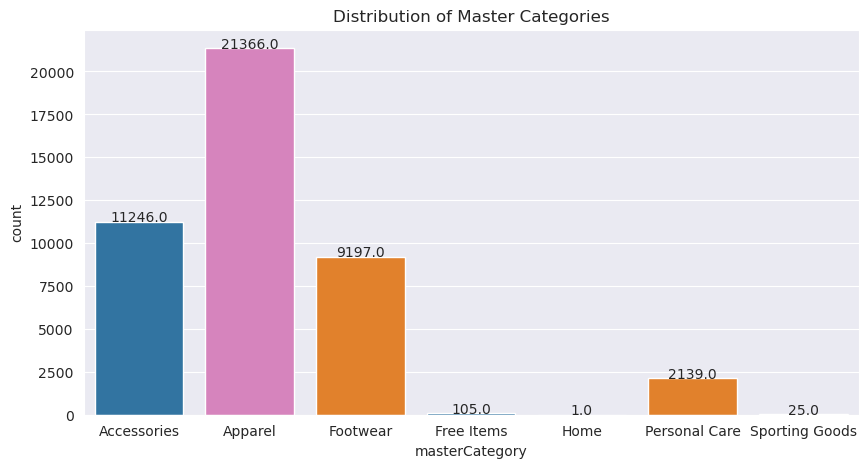

In [69]:
# Plot the distribution of the 'masterCategory' column
plt.figure(figsize=(10, 5))
sns.countplot(x='masterCategory', data=data , palette=colors)
plt.title('Distribution of Master Categories')

ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2, p.get_height() + 0.2, p.get_height(), ha='center')

ax.yaxis.grid(True)

plt.show()


We can see that the majority of our products are in the Apparel category with a count of 21366 accounting about half of the total products!

## 2) Sub Category

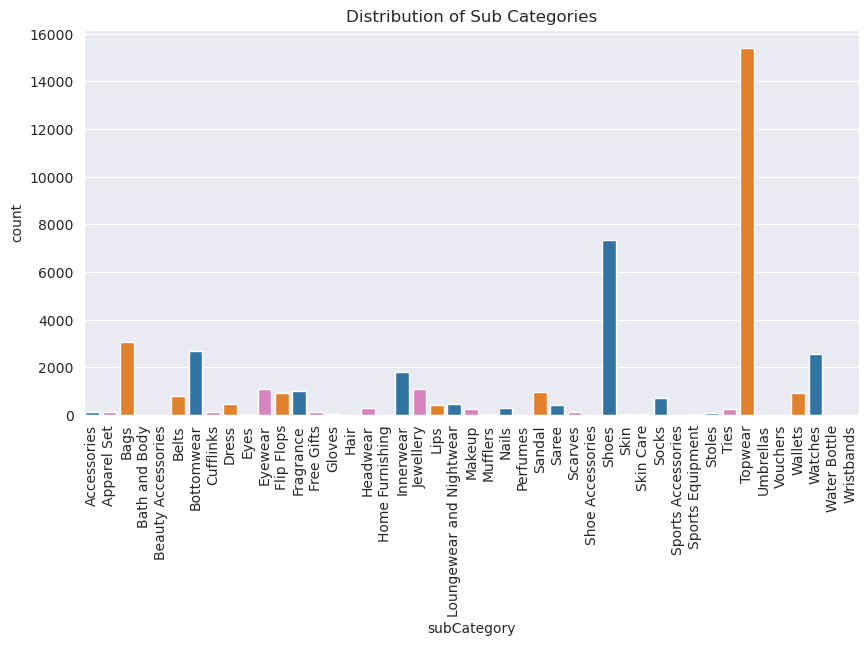

In [70]:
# Plot the distribution of the 'subCategory' column
plt.figure(figsize=(10, 5))
sns.countplot(x='subCategory', data=data , palette = colors)
plt.title('Distribution of Sub Categories')
plt.xticks(rotation=90)

plt.show()



The majority of products are in the Topwear subcategory with a count of about 15k with Shoes being the 2nd at about 8k products.

## 3) Article Type

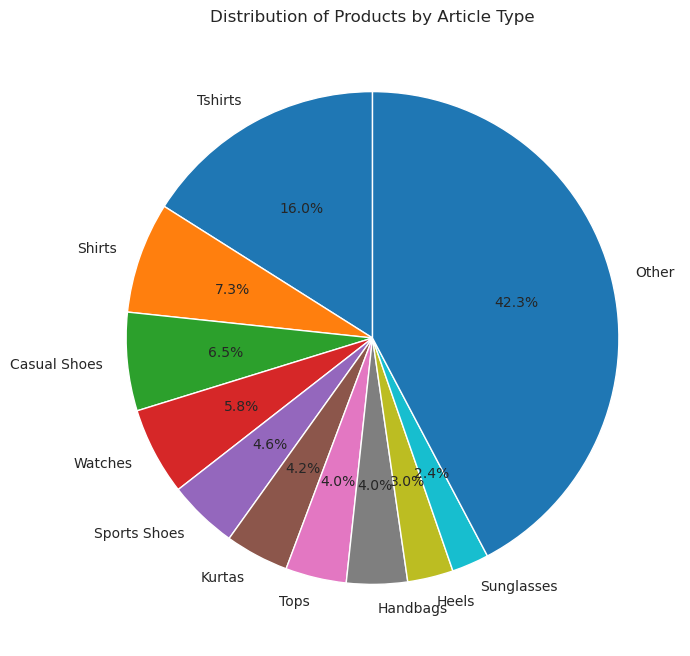

In [71]:
import matplotlib.pyplot as plt

# Get the counts of each articleType value
article_type_counts = data['articleType'].value_counts()

# Combine the counts of all values with less than 1000 occurences into "Other"
other_count = article_type_counts[article_type_counts < 1000].sum()
article_type_counts = article_type_counts[article_type_counts >= 1000]
article_type_counts['Other'] = other_count

# Create a pie chart of the articleType counts
plt.figure(figsize=(8, 8))
plt.pie(article_type_counts, labels=article_type_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Products by Article Type')
plt.show()


We have a wide variety of articles present in our product catalogue with Tshirts and Shirts getting a major share about 23% which proves why the Topwear category is the biggest subcategory.

## 4) Gender 

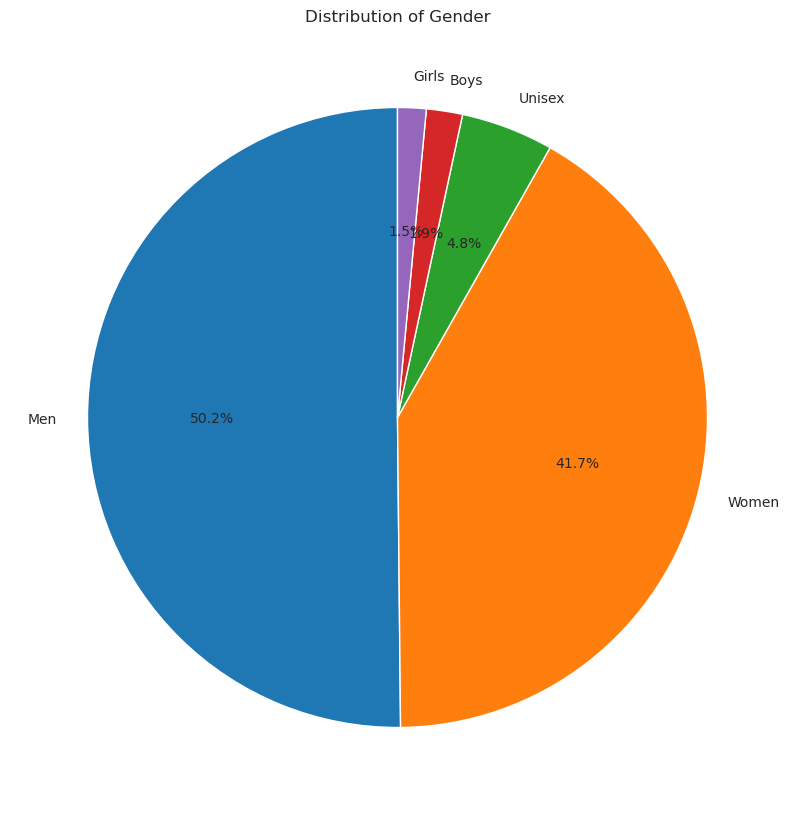

In [72]:


# Calculate the count of each gender value
gender_counts = data['gender'].value_counts()

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(10, 20))

# Create the pie chart with labels and colors
# colors = ['tab:blue', 'tab:pink', 'tab:orange']
ax.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90)

# Add a title
ax.set_title('Distribution of Gender')

# Show the plot
plt.show()


Surprisingly we got more products catering to men(50%) over women(41.7%), with some unisex clothing too.


## 5) Seasonal

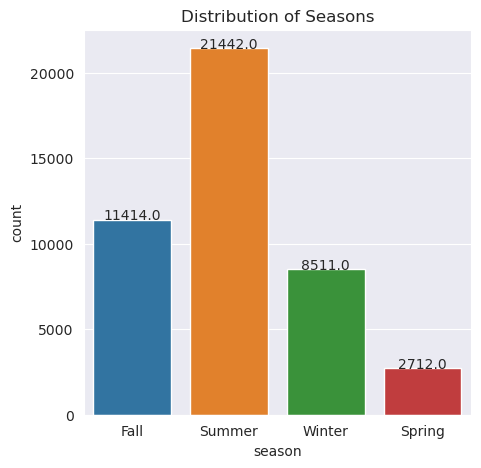

In [73]:
# Plot the distribution of the 'season' column
plt.figure(figsize=(5, 5))
sns.countplot(x='season', data=data )
plt.title('Distribution of Seasons')
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2, p.get_height() + 0.2, p.get_height(), ha='center')
plt.show()

## 6) Usage

Our inventory is full of summer products and we need to add some for the spring season

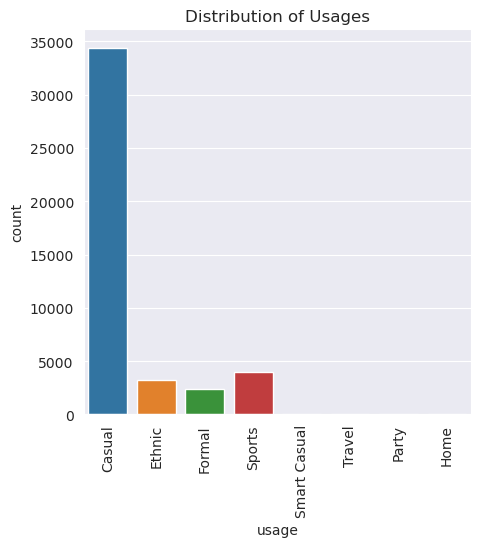

In [75]:
plt.figure(figsize=(5, 5))
sns.countplot(x='usage', data=data )
plt.title('Distribution of Usages')

plt.xticks(rotation=90)
plt.show()

With an overwhelming majority of Casual products but a dirth of products for Home, Party Travel and Smart Casuals makes us rething our product catalogue.

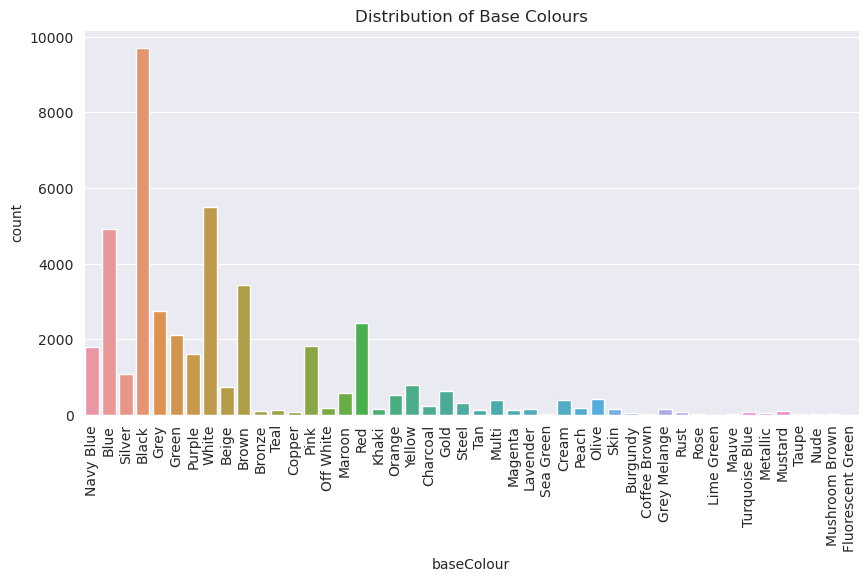

In [76]:
plt.figure(figsize=(10, 5))
sns.countplot(x='baseColour', data=data)
plt.title('Distribution of Base Colours')
plt.xticks(rotation=90)
plt.show()

Our products has the majority of Black , White , Blue , Brown , Red , Pink , Grey,  Green and Purple.

# Bivariate Analysis

## 1) Seasons and Gender

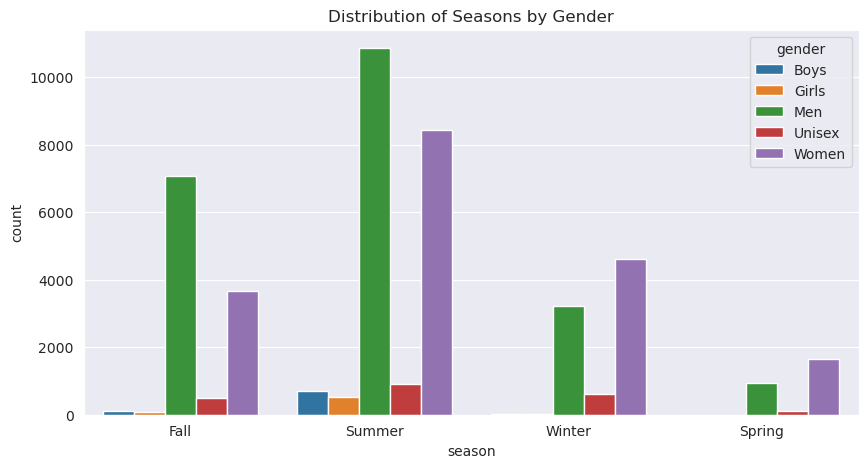

In [77]:
plt.figure(figsize=(10, 5))
sns.countplot(x='season', hue='gender', data=data)
plt.title('Distribution of Seasons by Gender')
plt.show()

The interesting observation here is that for the seasons of winter and springs we have more products for Women even after most of the products (50.2% to be precise) are for Men.

## 2) Usage and Gender

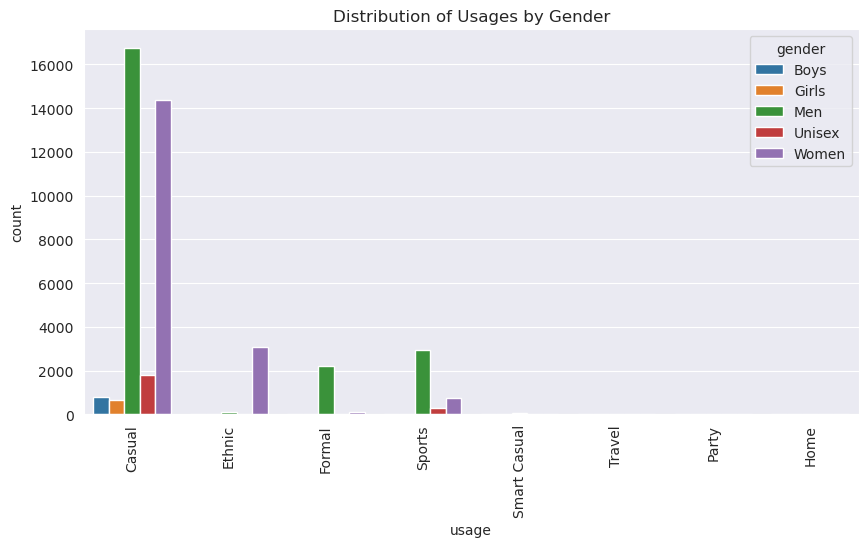

In [78]:
plt.figure(figsize=(10, 5))
sns.countplot(x='usage', hue='gender', data=data)
plt.title('Distribution of Usages by Gender')
plt.xticks(rotation=90)
plt.show()

Here we can note that Ethnic products have an overwhelming majority of women centric products.

## 3) Article categories by gender

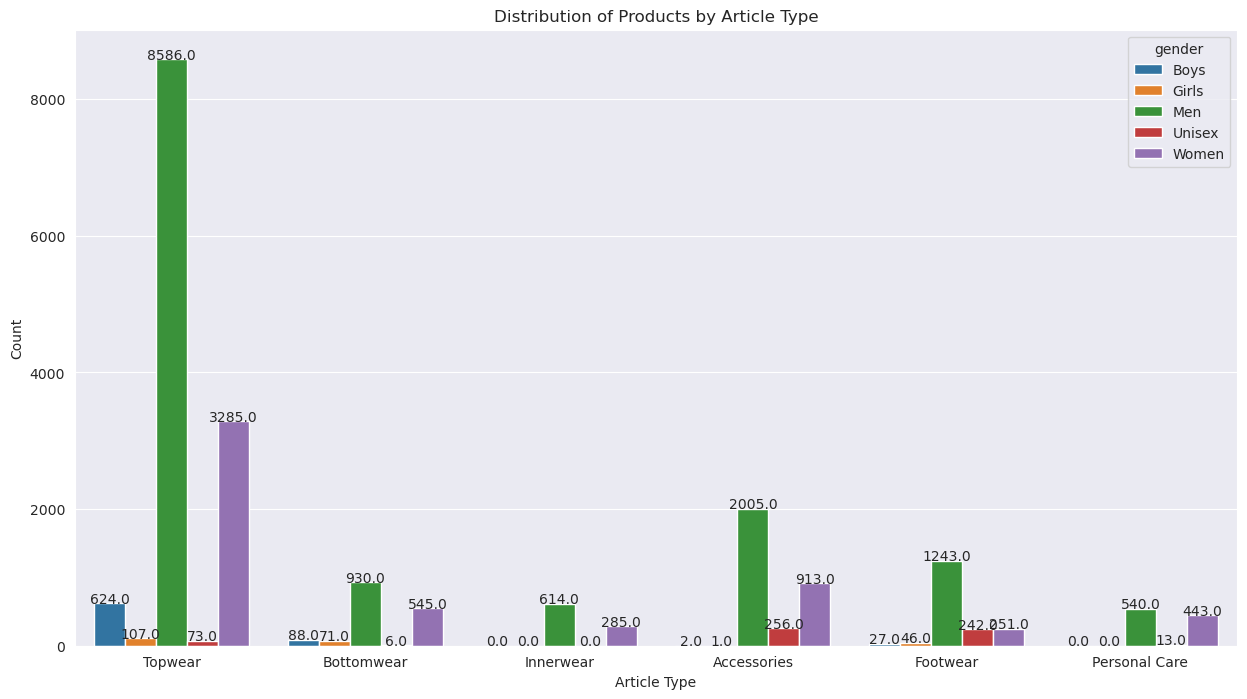

In [79]:
import pandas as pd
import seaborn as sns

# Define the article type categories and group the values accordingly
article_categories = {'Topwear': ['Shirts', 'Tshirts', 'Casual Shirts', 'Formal Shirts', 'Sweatshirts', 'Jackets', 'Blazers', 'Kurtas'],
                      'Bottomwear': ['Jeans', 'Casual Trousers', 'Shorts', 'Track Pants', 'Tights', 'Leggings'],
                      'Innerwear': ['Briefs', 'Vests', 'Boxers', 'Trunks'],
                      'Accessories': ['Socks', 'Belts', 'Wallets', 'Ties', 'Caps', 'Mufflers', 'Scarves', 'Suspenders', 'Wristbands', 'Sports Accessories', 'Jewellery', 'Eyewear'],
                      'Footwear': ['Shoes', 'Flip Flops', 'Sandals', 'Sneakers', 'Running Shoes', 'Training Shoes'],
                      'Personal Care': ['Fragrance', 'Deodorant', 'Lip Care', 'Body Lotion', 'Face Wash and Cleanser', 'Body Wash and Scrub', 'Shampoo', 'Hair Colour', 'Hand Wash and Sanitizer', 'Perfume and Body Mist', 'Hair Styling', 'Makeup']}
                      
data['articleType_category'] = data['articleType'].apply(lambda x: next((category for category, types in article_categories.items() if x in types), 'Other'))

# Create a nested countplot of articleType categories and types
plt.figure(figsize=(15, 8))
sns.countplot(data=data, x='articleType_category', hue='gender', order=list(article_categories.keys()))

# Add count labels to each bar
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2, p.get_height() + 0.2, p.get_height(), ha='center')

plt.title('Distribution of Products by Article Type')
plt.xlabel('Article Type')
plt.ylabel('Count')

plt.show()


# Define the article type categories and group the values accordingly

 To avoid messy presentation we clubbed various article types into broader categories like Topwear and Footwear. 
 The categories are as follows:-
*  **Topwear**: 'Shirts', 'Tshirts', 'Casual Shirts', 'Formal Shirts', 'Sweatshirts', 'Jackets', 'Blazers', 'Kurtas'
*  **Bottomwear**: 'Jeans', 'Casual Trousers', 'Shorts', 'Track Pants', 'Tights', 'Leggings'
*  **Footwear**: 'Shoes', 'Flip Flops', 'Sandals', 'Sneakers', 'Running Shoes', 'Training Shoes'
*  **Innerwear**: 'Briefs', 'Vests', 'Boxers', 'Trunks'
*  **Accessories**: 'Socks', 'Belts', 'Wallets', 'Ties', 'Caps', 'Mufflers', 'Scarves', 'Suspenders', 'Wristbands', 'Jewellery', 'Eyewear'
* **Personal Care**: 'Fragrance', 'Deodorant', 'Lip Care', 'Body Lotion', 'Face Wash and Cleanser', 'Body Wash and Scrub', 'Shampoo', 'Hair Colour',  'Hand Wash and Sanitizer', 'Perfume and Body Mist', 'Hair Styling', 'Makeup'

## 4) Sub Category and Master Category

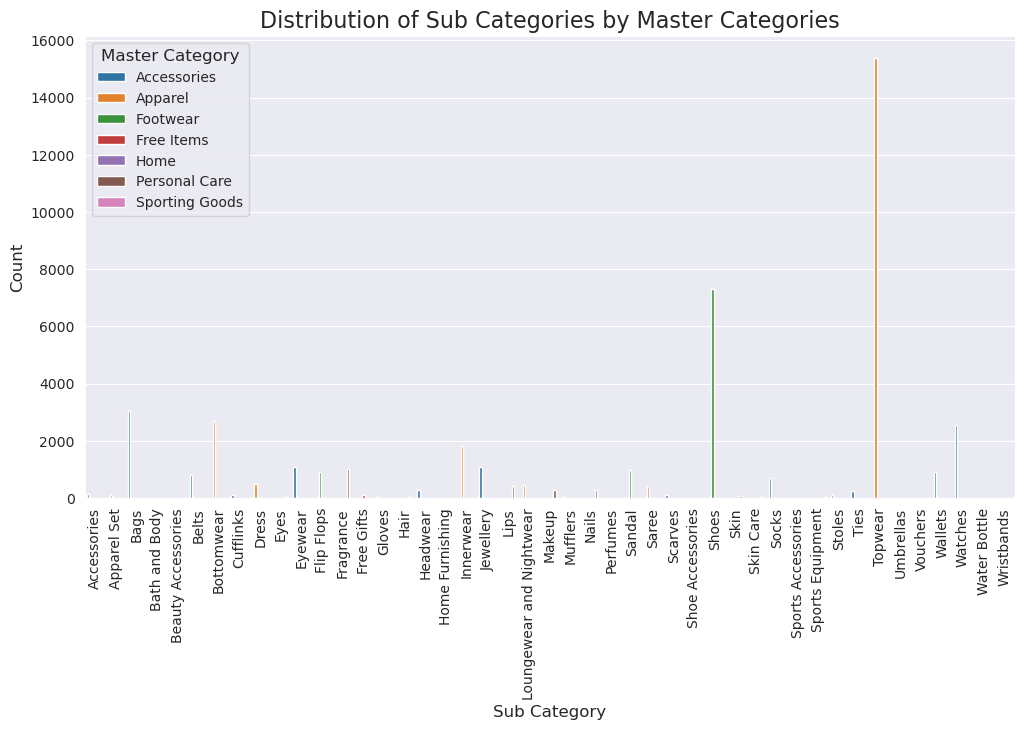

In [84]:
# colors = ['#BFD7B5', '#EAC4D4', '#B4B2C5', '#F3B3A6', '#F9C7A9', '#FFE0AC', '#D5E8D4', '#C3B5E5', '#F5B5D9', '#E5E5E5']

# Create the countplot with colors and labels
plt.figure(figsize=(12,6))
sns.countplot(x='subCategory', hue='masterCategory', data=data)
plt.title('Distribution of Sub Categories by Master Categories', fontsize=16)
plt.xlabel('Sub Category', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Master Category', fontsize=10, title_fontsize=12)
plt.xticks(rotation=90)

# Show the plot
plt.show()

Here we see the biggest sub categories for each Master Category 
* Accesories - Bags and Watches
* Apparel - Topwear, Bottomwear and Innerwear
* Footwear - 


## 5) Color Distribution of Master Categories

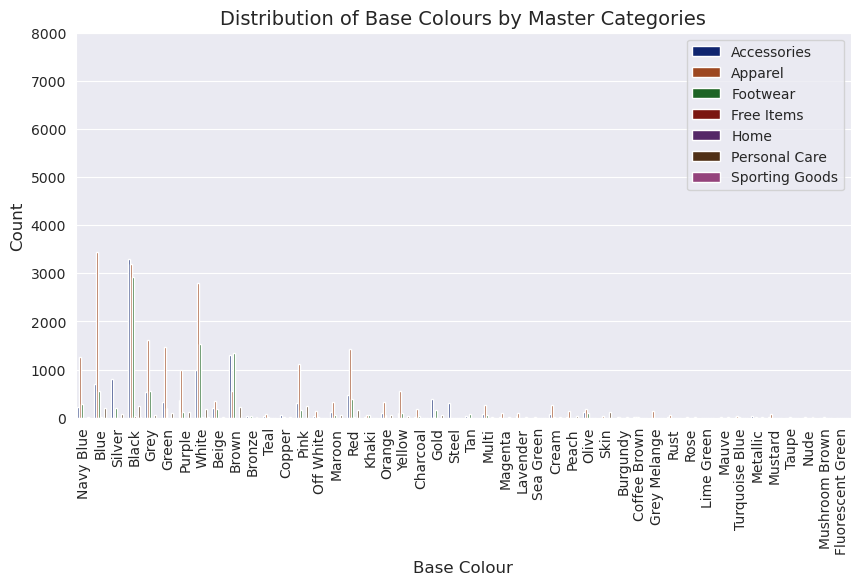

In [90]:
fig, ax = plt.subplots(figsize=(10, 5))

# Create the countplot with colors
palette = sns.color_palette('dark')
sns.countplot(x='baseColour', hue='masterCategory', data=data, palette=palette)

# Set the x-axis label and rotation
ax.set_xlabel('Base Colour', fontsize=12)
ax.tick_params(axis='x', labelsize=10, rotation=90)

# Set the y-axis label and limit
ax.set_ylabel('Count', fontsize=12)
ax.set_ylim(0, 8000)

# Add a title
ax.set_title('Distribution of Base Colours by Master Categories', fontsize=14)

# Add a legend
ax.legend(loc='upper right')

# Show the plot
plt.show()

We discovered that different categories have vastly different colour distributions, and that some article types are correlated with particular base hues.

# Conclusion

## Univariate Analysis:-

Our exploration of the fashion product images dataset through univariate analysis has revealed some notable patterns. From the frequency distribution of different variables, we can see that most products belong to the Apparel category, with subcategories such as T-shirts, and Shirts being the most common ones. Moreover, we found that the dataset has a majority of products for Men, with black and white being the most frequently used base colours. These insights will be useful for further analysis and understanding of the fashion industry.

## Bivariate Analysis:- 

Our bivariate analysis of the fashion product images dataset provides a deeper understanding of the relationships between different variables. Through the use of visualizations such as scatter plots and heatmaps, we were able to identify correlations between different categories, subcategories, and article types. We found that certain article types are associated with specific base colours, and that the distribution of colours varies significantly between different subcategories. These insights can help fashion brands better target their marketing and design efforts, and gain a competitive advantage in the industry.